In [29]:
# ==========================================
# 1. Import libraries
# ==========================================
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# ==========================================
# 2. Load dataset
# ==========================================
df = pd.read_csv("student_habits_performance.csv")
print(df.head())

# ==========================================
# 3. Select lifestyle features only
# ==========================================
lifestyle_features = [
    "study_hours_per_day",
    "social_media_hours",
    "netflix_hours",
    "sleep_hours",
    "exercise_frequency",
    "attendance_percentage",
    "mental_health_rating"
]

X_life = df[lifestyle_features]

# ==========================================
# 4. Standardize data
# ==========================================
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_life)

# ==========================================
# 5. K-means clustering
# ==========================================
kmeans = KMeans(n_clusters=5, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

df["cluster"] = clusters

# ==========================================
# 6. Cluster lifestyle summary
# ==========================================
cluster_summary = df.groupby("cluster")[lifestyle_features + ["exam_score"]].mean()

print(cluster_summary)


  student_id  age  gender  study_hours_per_day  social_media_hours  \
0      S1000   23  Female                  0.0                 1.2   
1      S1001   20  Female                  6.9                 2.8   
2      S1002   21    Male                  1.4                 3.1   
3      S1003   23  Female                  1.0                 3.9   
4      S1004   19  Female                  5.0                 4.4   

   netflix_hours part_time_job  attendance_percentage  sleep_hours  \
0            1.1            No                   85.0          8.0   
1            2.3            No                   97.3          4.6   
2            1.3            No                   94.8          8.0   
3            1.0            No                   71.0          9.2   
4            0.5            No                   90.9          4.9   

  diet_quality  exercise_frequency parental_education_level internet_quality  \
0         Fair                   6                   Master          Average  

E:\ana\envs\teaman8823\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


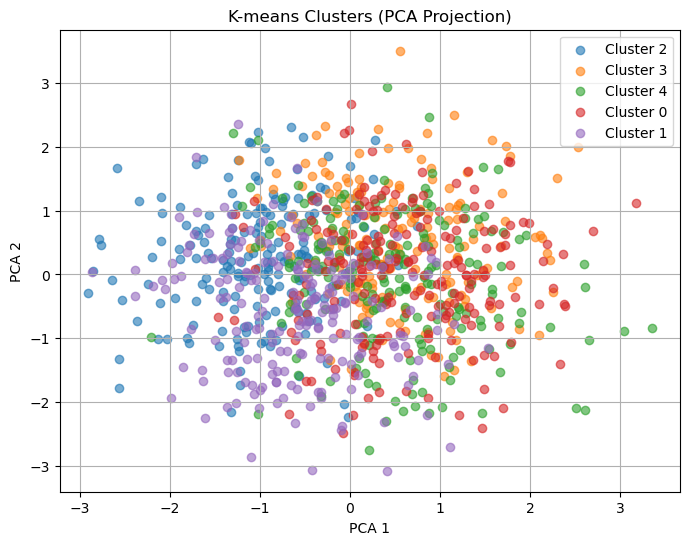

In [30]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# PCA transform to 2D for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

df["pca1"] = X_pca[:, 0]
df["pca2"] = X_pca[:, 1]

plt.figure(figsize=(8,6))
for c in df["cluster"].unique():
    plt.scatter(df[df.cluster == c]["pca1"],
                df[df.cluster == c]["pca2"],
                label=f"Cluster {c}",
                alpha=0.6)

plt.title("K-means Clusters (PCA Projection)")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.legend()
plt.grid(True)
plt.show()


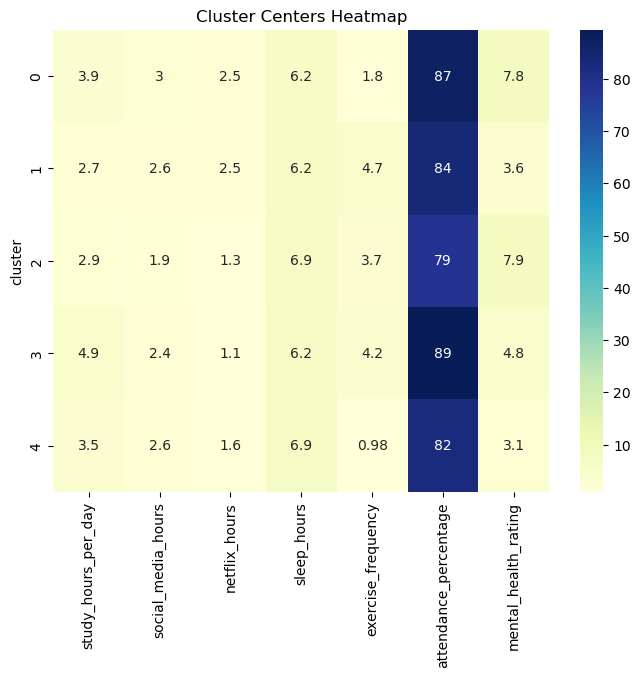

In [32]:
import seaborn as sns
plt.figure(figsize=(8,6))

sns.heatmap(cluster_means, annot=True, cmap="YlGnBu")
plt.title("Cluster Centers Heatmap")
plt.show()


C:\Users\tonyg\AppData\Local\Temp\ipykernel_10536\2716901790.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=cluster_scores, x="cluster", y="exam_score", palette="viridis")


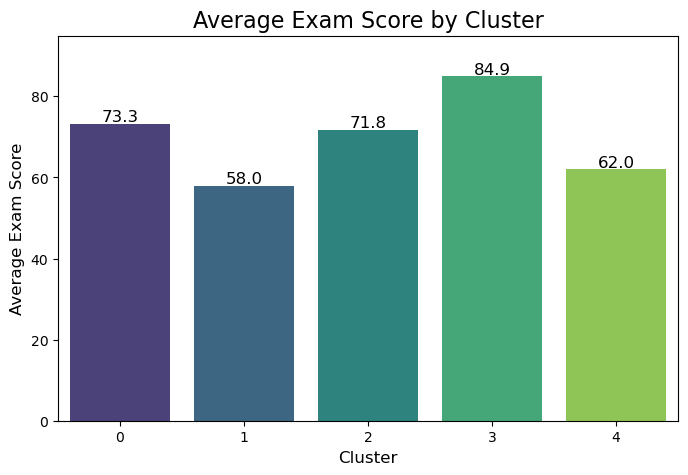

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

# 計算每群平均成績
cluster_scores = df.groupby("cluster")["exam_score"].mean().reset_index()

plt.figure(figsize=(8,5))
sns.barplot(data=cluster_scores, x="cluster", y="exam_score", palette="viridis")

plt.title("Average Exam Score by Cluster", fontsize=16)
plt.xlabel("Cluster", fontsize=12)
plt.ylabel("Average Exam Score", fontsize=12)

# 在 bar 上顯示數值
for i, v in enumerate(cluster_scores["exam_score"]):
    plt.text(i, v + 0.5, f"{v:.1f}", ha='center', fontsize=12)

plt.ylim(0, max(cluster_scores["exam_score"]) + 10)
plt.show()
